In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification, ViTFeatureExtractor
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Directories
train_dir = "/kaggle/input/dermnet/train"
val_dir = "/kaggle/input/dermnet/test"

# Load Pretrained Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# Define image transformations (for Data Augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

# Load Dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Classes: {class_names}")

# Load Pretrained ViT Model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=num_classes
)
model.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training Function
def train(model, train_loader, val_loader, epochs=10):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images).logits
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accs, val_accs

# Train the Model
train_losses, val_losses, train_accs, val_accs = train(model, train_loader, val_loader, epochs=10)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Classes: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/10] - Loss: 2.5732, Acc: 0.3017, Val Loss: 2.2302, Val Acc: 0.4038
Epoch [2/10] - Loss: 2.0056, Acc: 0.4739, Val Loss: 1.8628, Val Acc: 0.5022
Epoch [3/10] - Loss: 1.5546, Acc: 0.6100, Val Loss: 1.6050, Val Acc: 0.5612
Epoch [4/10] - Loss: 1.1251, Acc: 0.7350, Val Loss: 1.4332, Val Acc: 0.5995
Epoch [5/10] - Loss: 0.7644, Acc: 0.8309, Val Loss: 1.3672, Val Acc: 0.6172
Epoch [6/10] - Loss: 0.4941, Acc: 0.8961, Val Loss: 1.3527, Val Acc: 0.6274
Epoch [7/10] - Loss: 0.3153, Acc: 0.9351, Val Loss: 1.3612, Val Acc: 0.6304
Epoch [8/10] - Loss: 0.2176, Acc: 0.9521, Val Loss: 1.3311, Val Acc: 0.6442
Epoch [9/10] - Loss: 0.1522, Acc: 0.9636, Val Loss: 1.4358, Val Acc: 0.6227
Epoch [10/10] - Loss: 0.1320, Acc: 0.9638, Val Loss: 1.4509, Val Acc: 0.6322


Model saved successfully!


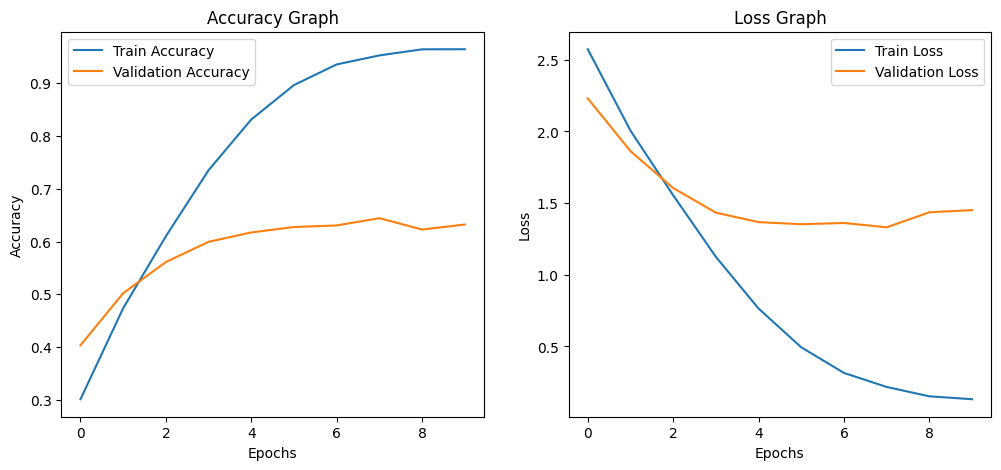

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.82      0.95      0.88       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.67      0.72      0.69       288
                                          Atopic Dermatitis Photos       0.59      0.56      0.58       123
                                            Bullous Disease Photos       0.61      0.42      0.49       113
                Cellulitis Impetigo and other Bacterial Infections       0.20      0.45      0.27        73
                                                     Eczema Photos       0.66      0.65      0.66       309
                                      Exanthems and Drug Eruptions       0.54      0.50      0.52       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.51      0.58      0.54        60
    

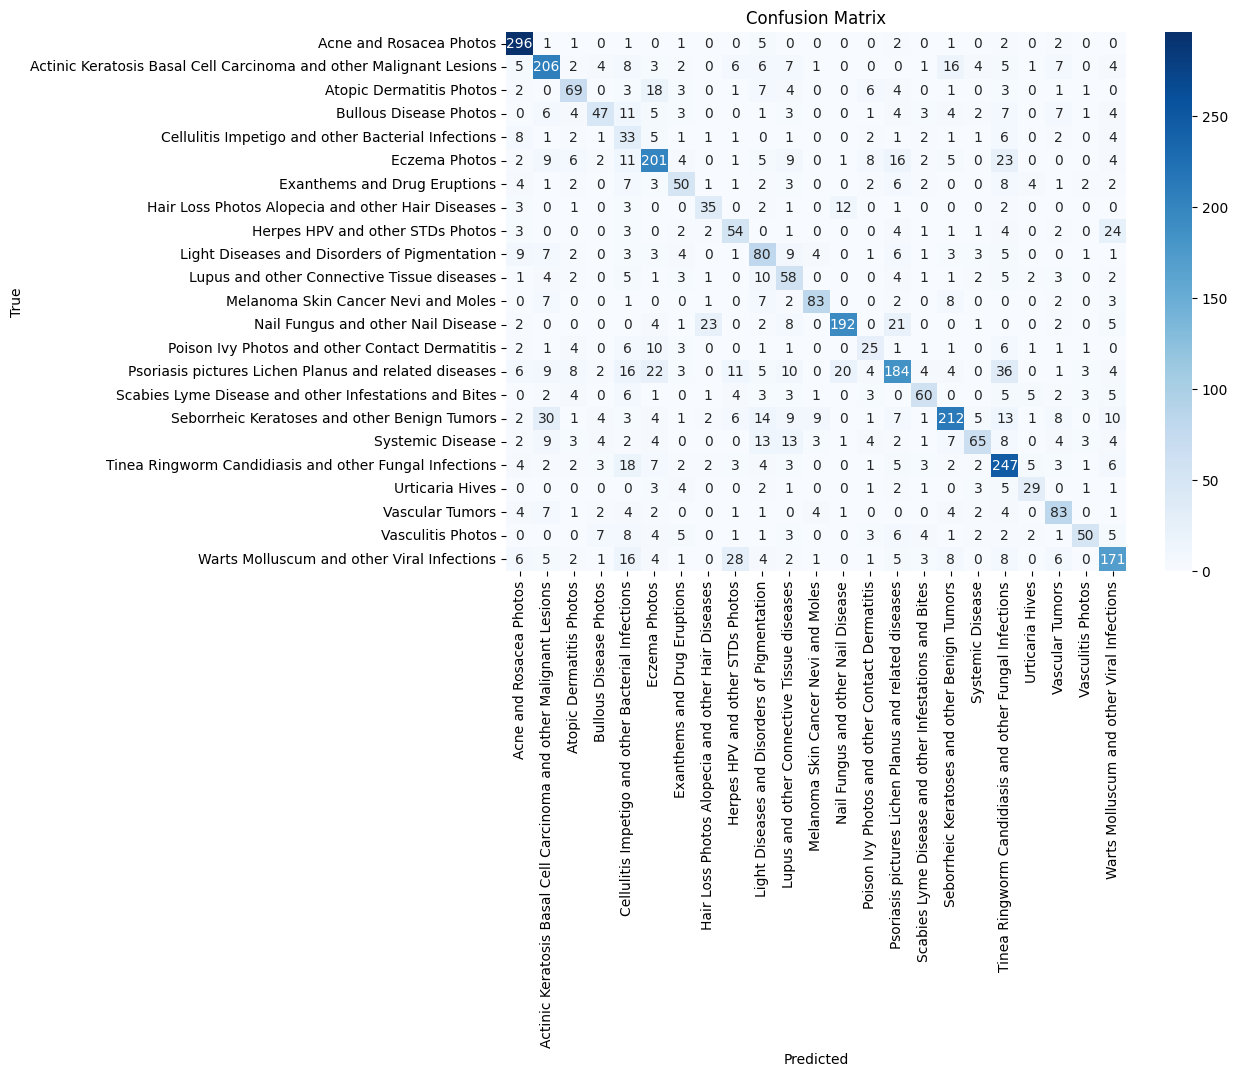

In [3]:

# Save Model
torch.save(model.state_dict(), "/kaggle/working/vit_model.pth")
print("Model saved successfully!")

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")

plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

# Evaluate Model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [6]:
import torch
import torchvision.transforms as transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image

# Define class names (Make sure they match your trained model)
class_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 
               'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 
               'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 
               'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 
               'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 
               'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 
               'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 
               'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 
               'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 
               'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

# Load the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# Load trained model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(class_names)
)
model.load_state_dict(torch.load("/kaggle/working/vit_model.pth", map_location=torch.device("cpu")))
model.eval()

# Function to preprocess the image
def process_image(image_path):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
    ])

    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to predict image class
def predict_image(image_path):
    image = process_image(image_path)

    with torch.no_grad():
        outputs = model(image).logits
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)

    predicted_label = class_names[predicted_class.item()]
    confidence_score = confidence.item() * 100  # Convert to percentage

    print(f"Predicted Class: {predicted_label}")
    print(f"Confidence Score: {confidence_score:.2f}%")

# Example usage
image_path = "/kaggle/input/dermnet/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-19.jpg"  # Change this to your image path
predict_image(image_path)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-6-88470ccd87d1>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globa

Predicted Class: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Confidence Score: 98.90%
